# ------------------------Week-10 Minst_Digit------------------------------

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

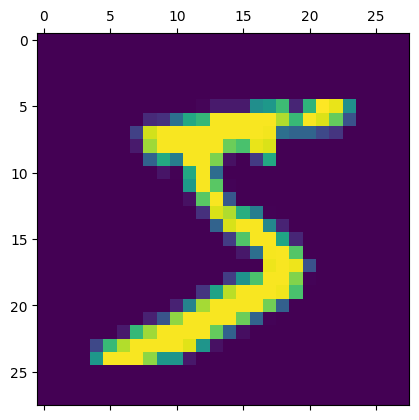

In [5]:
plt.matshow(x_train[0])
plt.show()

In [6]:
# Build model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [7]:
# Compile & train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9142 - loss: 0.2977 - val_accuracy: 0.9589 - val_loss: 0.1353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9582 - loss: 0.1397 - val_accuracy: 0.9693 - val_loss: 0.0991
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9682 - loss: 0.1065 - val_accuracy: 0.9750 - val_loss: 0.0806
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9733 - loss: 0.0880 - val_accuracy: 0.9767 - val_loss: 0.0750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0753 - val_accuracy: 0.9768 - val_loss: 0.0762


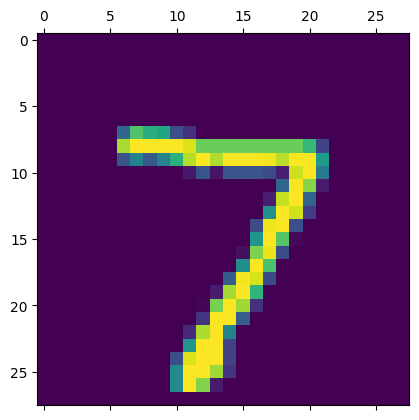

In [8]:
plt.matshow(x_test[0])

In [9]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0762

Test Accuracy: 0.9768


In [10]:
# Predict and create confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[ 970,    0,    2,    1,    0,    1,    3,    1,    2,    0],
       [   0, 1124,    3,    1,    0,    0,    2,    0,    5,    0],
       [   3,    0,  997,   13,    3,    0,    1,    5,    9,    1],
       [   0,    0,    1, 1000,    0,    1,    0,    4,    2,    2],
       [   1,    0,    3,    0,  966,    0,    3,    0,    2,    7],
       [   2,    1,    0,   16,    0,  860,    3,    1,    4,    5],
       [   5,    3,    2,    1,    7,    6,  930,    0,    4,    0],
       [   3,    7,   10,    8,    0,    0,    0,  990,    1,    9],
       [   3,    0,    2,    7,    5,    2,    1,    3,  948,    3],
       [   0,    4,    0,    8,    7,    2,    1,    1,    3,  983]])

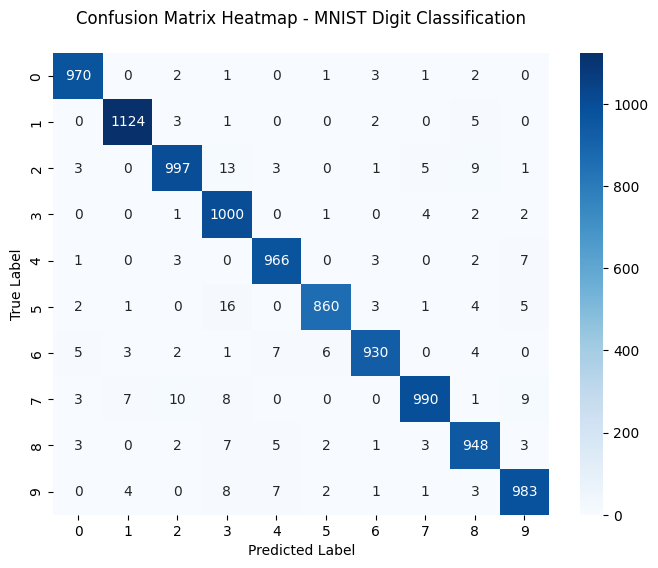

In [12]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap - MNIST Digit Classification\n")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()